In [36]:
import gower
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import seaborn as sns
from sklearn.metrics import rand_score, adjusted_rand_score
import sys
import os

## import tSNE

In [37]:
## import custom scripts
sys.path.append(os.path.abspath(os.path.join('scripts')))
import preprocessing
import autoencoder_detection
import isolation_forest_detection
import lof_detection
import knn_detection
import dbscan_detection
import pca_detection
import utils

importlib.reload(utils)
importlib.reload(lof_detection)
importlib.reload(autoencoder_detection)
importlib.reload(preprocessing)
importlib.reload(isolation_forest_detection)
importlib.reload(knn_detection)
importlib.reload(dbscan_detection)
importlib.reload(pca_detection)

<module 'pca_detection' from '/home/ronin/Dev/notebooks/machinelearningformodeling/unsupervised/project/scripts/pca_detection.py'>

In [38]:
pca_indices = pca_detection.main()
pd.DataFrame(pca_indices).value_counts()

PCA: explained variation per principal component: [0.55993 0.27381 0.06283 0.02981 0.02188 0.01664 0.01021 0.00602]


 0    6829
-1     371
Name: count, dtype: int64

In [39]:
dbscan_indices = dbscan_detection.main()
pd.DataFrame(dbscan_indices).value_counts()

 0    6862
-1     338
Name: count, dtype: int64

In [40]:
# Importing the dataset
lof_indices = lof_detection.main()
pd.DataFrame(lof_indices).value_counts()

 0    6840
-1     360
Name: count, dtype: int64

In [41]:
autoencoder_indices = np.array(autoencoder_detection.main())
pd.DataFrame(autoencoder_indices).value_counts()

Epoch [1/50], Loss: 0.1344, LR: 0.01
Epoch [11/50], Loss: 0.0222, LR: 0.005
Epoch [21/50], Loss: 0.0115, LR: 0.0025
Epoch [31/50], Loss: 0.0046, LR: 0.00125
Epoch [41/50], Loss: 0.0080, LR: 0.000625
Training complete
treshold is: 0.0866
percentage of outliers is:  3.62%


 0    6939
-1     261
Name: count, dtype: int64

In [42]:
isolation_forest_indices = pd.DataFrame(isolation_forest_detection.main()).replace({1:0}).to_numpy()[:,0]
pd.DataFrame(isolation_forest_indices).value_counts()

 0    6840
-1     360
Name: count, dtype: int64

In [43]:
knn_indices = np.array(knn_detection.main())
pd.DataFrame(knn_indices).value_counts()

knee = 0.05163099989295006


 0    6882
-1     318
Name: count, dtype: int64

In [44]:
tot_indices = (lof_indices + 
                autoencoder_indices +  
                isolation_forest_indices + 
                knn_indices + 
                dbscan_indices +
                pca_indices)
tot_indices = -1 * tot_indices

In [45]:
np.sum(tot_indices >= 5)

216

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.027s...
[t-SNE] Computed neighbors for 7200 samples in 0.597s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.003135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.452148
[t-SNE] KL divergence after 1000 iterations: 0.983925


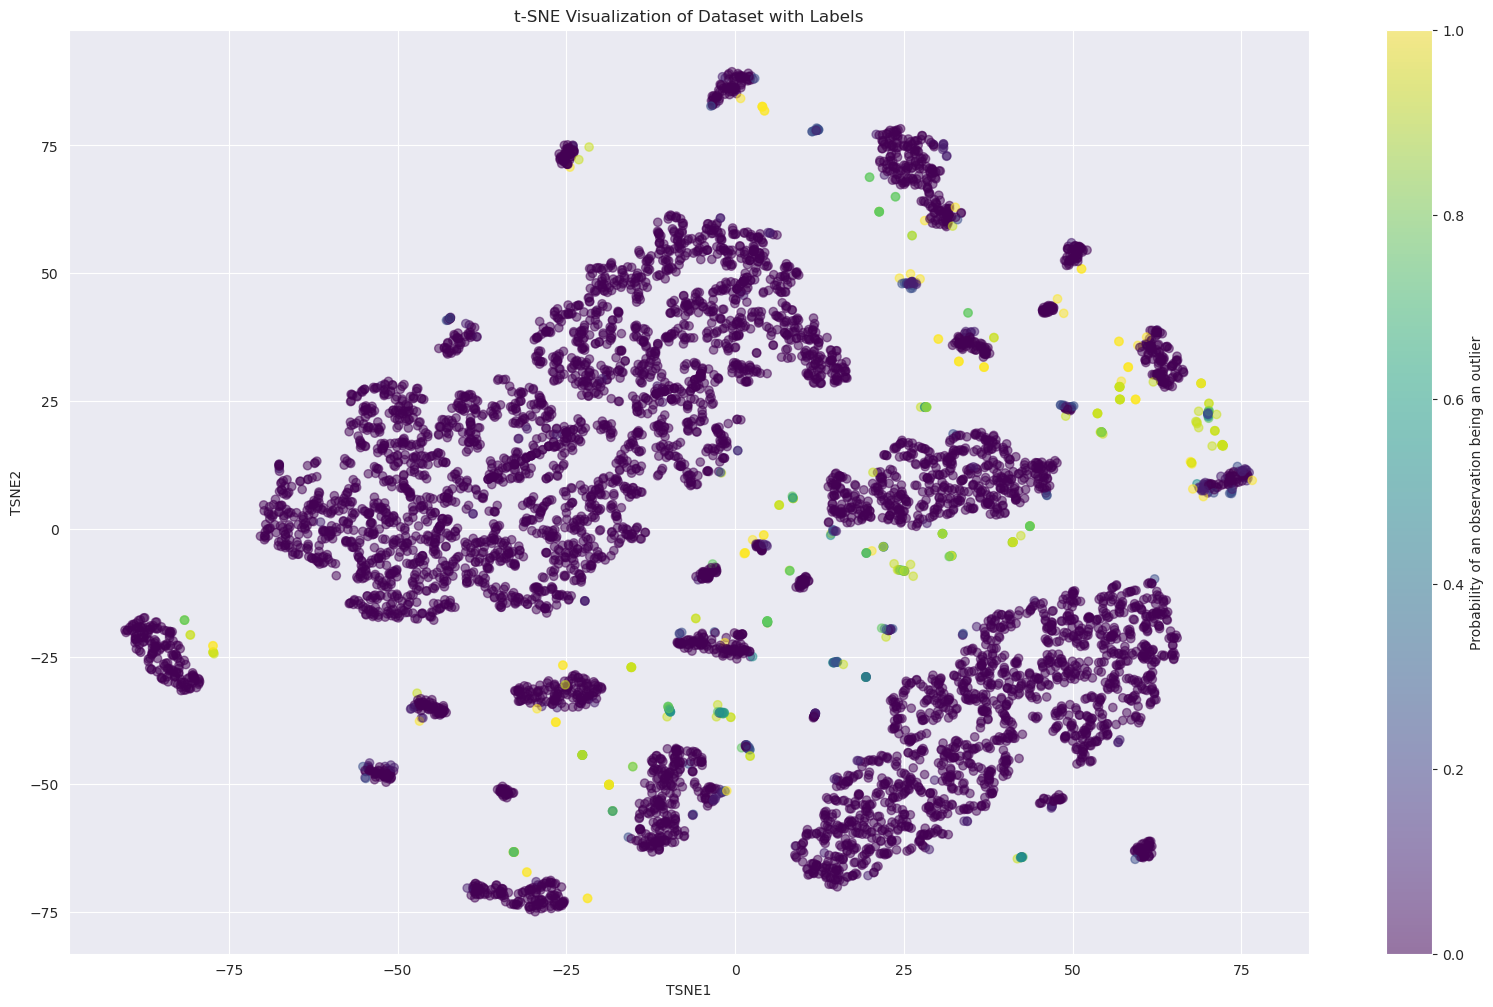

In [46]:
outl_probs = list(map(utils.sigmoid_to_prob(k=6), tot_indices))
outl_probs = list(map(lambda x: x/6, outl_probs))

utils.plot_TSNE_2(dist_matrix= gower.gower_matrix( preprocessing.load_dataset()), 
            labels=outl_probs)

In [38]:
np.save('results.npy', outl_probs)

In [47]:
utils.plot_3d_TSNE(df=None, 
                labels=tot_indices, 
                dist_matrix=gower.gower_matrix(preprocessing.load_dataset()))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.027s...
[t-SNE] Computed neighbors for 7200 samples in 0.578s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.003135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.758827
[t-SNE] KL divergence after 1000 iterations: 0.823106


In [89]:
non_out = tot_indices == 0

In [90]:
out = tot_indices > 2

In [91]:
df = preprocessing.load_dataset()

In [92]:
np.abs(np.sum(df[non_out].iloc[:,utils.binary_indices] - 1, axis=1)).describe()

count    6531.000000
mean        0.651661
std         0.640220
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
dtype: float64

In [93]:
np.abs(np.sum(df[out].iloc[:,utils.binary_indices] - 1, axis=1)).describe()

count    342.000000
mean       2.426901
std        0.701219
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
dtype: float64

In [66]:
list_of_indices =   [lof_indices,
                     autoencoder_indices ,
                    isolation_forest_indices,
                    knn_indices,
                    dbscan_indices,
                    pca_indices]
method_names =  ["lof",
                 "autoencoder",
                "isolation_forest",
                "knn",
                "dbscan",
                "pca"]

In [67]:
def compute_rand_indices(label_lists):
    n = len(label_lists)
    rand_indices = np.zeros((n, n))
    for i in range(n):
        for j in range(i,n): # it is symmetric, i am just computing half
            #score = adjusted_rand_score(label_lists[i], label_lists[j])
            score = rand_score(label_lists[i], label_lists[j])
            rand_indices[i, j] = score
            rand_indices[j, i] = score
            
    
    return rand_indices

def plot_heatmap(matrix, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, annot=True, cmap="viridis", vmin=0.7)
    plt.title('Rand Index Heatmap')
    plt.show()

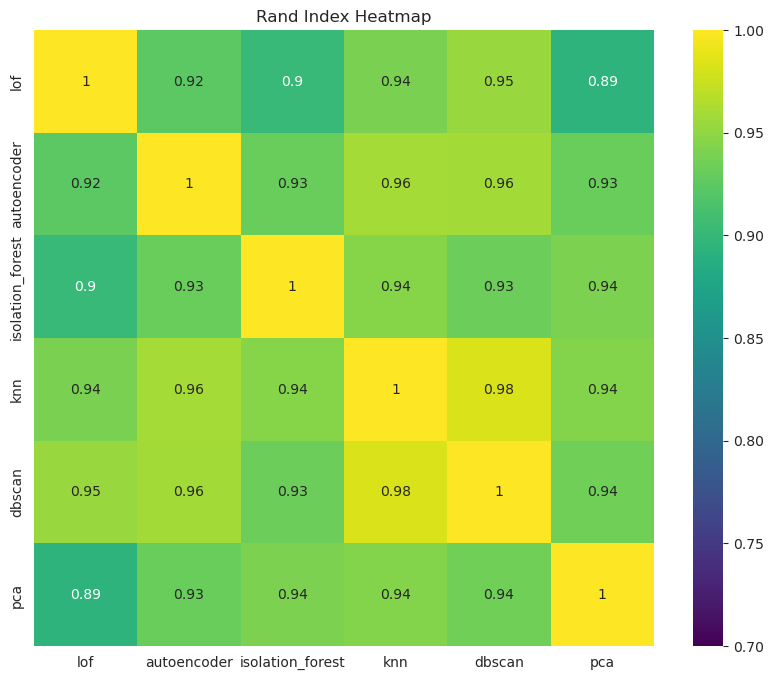

In [68]:
plot_heatmap(compute_rand_indices(list_of_indices), labels=method_names)